# Python Script for selecting, aggregating and arranging Census Tables


## Pre-req

In [ ]:
import pandas as pd
import functools

## Step 1: Importing the Data

* Look at the meta-data table to see which columns are of interest
* Create a list **names**,which will have our interested tables expressed as a CSV name provided by the census
* Create a dictionary **d** which will have a key corresponding to a name, and a value corresponding to the read csv file itself


In [ ]:
dataTabs = ["01","02","04A","04B","10A",
            "10B","10C","13A","13B","15",
            "17A","17B","17C","18","25",
            "28","30","31","57A","57B","59"]
names = []
d = {}

for tab in dataTabs:
    name = f"2016 Census GCP Postal Areas for AUST/2016Census_G{tab}_AUS_POA.csv"
    names.append(name)
    d[f"dataG{tab}"] = pd.read_csv(name)

## Step 2(a): Cleaning and Checking data

* Lambda function is used, which allows us to merge all the tables specified in a list
* Check for **missing** values before any analysis
* Check for any **absurd** values ( such as total populations which are zero )
* Result is a 2658 x 2687 array 

In [ ]:
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['POA_CODE_2016'],
                                            how='inner'), list(d.values()))

df_merged = df_merged[df_merged["Tot_P_P"] != 0]

## Step 2(b): Removing Excess Data Columns ( Attribute Specific) 
 
 
### Persona 1: Young people, aged 15-24

* G01: these include the 15-24 in education + non-education  
Age_15_19_yr_P  
Age_20_24_yr_P  


### Persona 2: Indigenous Australians ( identified as travel disadvantaged)

* G01  
Indigenous_P_Tot_P 


### Persona 4: Disabled People ( need assistance with core activites )

* G18:  
P_15_19_Need_for_assistance  
P_20_24_Need_for_assistance  
P_25_34_Need_for_assistance  
P_35_44_Need_for_assistance  
P_45_54_Need_for_assistance  
P_55_64_Need_for_assistance  
P_65_74_Need_for_assistance  
P_75_84_Need_for_assistance  
P_85_over_Need_for_assistance  
  

### Persona 5: Seniors (55+)
* G01:
Age_55_64_yr_P  
Age_65_74_yr_P  
Age_75_84_yr_P  
Age_85ov_P


### Other Qualities of Interest

*People who go to work using **only** a taxi*  
G59: "One_method_Taxi_P"  

*Households with more than 3 people & households with 1 or less motor vehicles*  
G30:  
Num_MVs_per_dweling_0_MVs  
Num_MVs_per_dweling_1_MVs  
  
G31:  
Num_Psns_UR_3_Total  
Num_Psns_UR_4_Total  
Num_Psns_UR_5_Total  
Num_Psns_UR_6mo_Total  

*Households which are a single-parent family with a dependant aged under 15*  
G25:     
OPF_ChU15_a_Total_F (One_parent_family_with_children_under_15_and_Total_Families)  

In [ ]:
# Keep all this as a dictionary if we ever need to group by specific personas

persona = {}

#General Stuff
persona[0] = ["POA_CODE_2016"]

#Population Density
persona[1] = ["Tot_P_P"]

#People aged 15-24
persona[2] = ["Age_15_19_yr_P", "Age_20_24_yr_P"]

#People who immigrated from 2011 to 2016
persona[3] = ["Tot_2011", "Tot_2012", "Tot_2013", "Tot_2014", "Tot_2015", "Tot_2016"]

#People over the age of 55 
persona[4] = ["Age_55_64_yr_P", "Age_65_74_yr_P", "Age_75_84_yr_P", "Age_85ov_P"]

#People over the age of 14 who need assitance with core activites/disabled
persona[5] = ["P_15_19_Need_for_assistance", "P_20_24_Need_for_assistance", "P_25_34_Need_for_assistance", "P_35_44_Need_for_assistance", "P_45_54_Need_for_assistance", "P_55_64_Need_for_assistance", "P_65_74_Need_for_assistance", "P_75_84_Need_for_assistance", "P_85_over_Need_for_assistance"]

#Number of single parent families with children under 15
persona[6] = ["OPF_ChU15_a_Total_F"]

#Households with less than one motor vehicle
persona[7] = ["Num_MVs_per_dweling_0_MVs", "Num_MVs_per_dweling_1_MVs"]

#Households with more than 3 people
persona[8] = ["Num_Psns_UR_3_Total", "Num_Psns_UR_4_Total", "Num_Psns_UR_5_Total", "Num_Psns_UR_6mo_Total"]

#Indigenous Australians
persona[9] = ["Indigenous_P_Tot_P"]

#Sole method to work is taxi
persona[10] = ["One_method_Taxi_P"]

#Median Income (under $1000/week) 
persona[11] = [ "Neg_Nil_inc_Tot",  "FI_1_149_Tot",  "FI_150_299_Tot",  "FI_300_399_Tot",  "FI_400_499_Tot",  "FI_500_649_Tot",  "FI_650_799_Tot",  "FI_800_999_Tot"]

In [ ]:
# But for this assignment we just need one big list - this is that list

persona_l = []
for i in persona.keys():
    persona_l.extend(persona[i])

## Step 3: Data Manipulation  

* Aggregate the columns of interest to form market composition of the persona
* Drop the columns after aggregation has bene completed
* Rename relevant columns for ease

In [ ]:
# Dictionary to merge columns
d_merge = {}

d_merge["Number of 15-24 Year Olds"] = ["Age_15_19_yr_P", "Age_20_24_yr_P"]
d_merge["Number Of Immigrants arrived since 2011"] = ["Tot_2011", "Tot_2016"]
d_merge["Number of people aged 55+"] = ["Age_55_64_yr_P", "Age_85ov_P"]
d_merge["Number of people aged 14 and old with a disability"] = ["P_15_19_Need_for_assistance", "P_85_over_Need_for_assistance"]
d_merge["Number of households with 1 or less cars"] = ["Num_MVs_per_dweling_0_MVs", "Num_MVs_per_dweling_1_MVs"]
d_merge["Number of Households with more than 3 people"] = ["Num_Psns_UR_3_Total", "Num_Psns_UR_6mo_Total"]
d_merge["Number of people under Median income"] = ["Neg_Nil_inc_Tot", "FI_800_999_Tot"]

In [ ]:
def sum_drop(df, name, start, end):
    '''Sums the columns in df from start to end into a new column called name'''
    df[name] = df.loc[:, start:end].sum(axis = 1)
    df = df.drop(columns = df.loc[:, start:end])
    return df

In [ ]:
persona_df = df_merged.loc[:,persona_l]

In [ ]:
for key, value in d_merge.items():
    persona_df = sum_drop(persona_df, key, value[0], value[1])

In [ ]:
persona_df = persona_df.rename(columns={'OPF_ChU15_a_Total_F': 'Single Parent Families with Children under 15'
                               , 'Tot_P_P': 'Total Population'
                               , 'Indigenous_P_Tot_P':'Total Indigenous Population'
                               , 'One_method_Taxi_P':"Number of people who travel to work ONLY by Taxi"
                               })

### Additional Data Manipulation

* Remove the "POA" which is infront of postcodes
* Convert our data in proportions of total population rather than raw data
* Convert each observation into a score which lies between 0 to 1, with 0 occuring least and 1 occurring most often using the below normalization formula

https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range

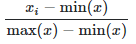


In [ ]:
#Removing POA for ease of use
persona_df['POA_CODE_2016'] = persona_df['POA_CODE_2016'].str.strip('POA')

#Calculating proportion of the population
persona_df.iloc[:,2:]=persona_df.iloc[:,1:].div(persona_df["Total Population"],axis=0)

#Assign a score from 0 to 1 based on each attribute
for i in persona_df.columns[1:]:
    persona_df[i]=(persona_df[i]-persona_df[i].min())/(persona_df[i].max()-persona_df[i].min())

### Combining the Attribute scores to create our Personas

Combining scores of each attribute to create our "Personas". This will allow us to compare postcodes in order to identify where a large propotion of **each** of our persona's reside

In [ ]:
# Creating persona 1 score 15-24 year old
## Under the Median Income
## Potentially in a house hold with less than 1 car but have a couple siblings

persona_df["Youth Score"]=persona_df.loc[:,["Number of 15-24 Year Olds",
                                                    "Number of households with 1 or less cars",
                                                    "Number of Households with more than 3 people",
                                                    "Number of people under Median income"]].sum(axis=1)

#Creating persona 2 score Senior Citizen
# Aged 55 +
# Still working, but may favour going to work in a taxi (traditional way of thinking)

persona_df["Senior's Score"]=persona_df.loc[:,["Number of people aged 55+",
                                                       "Number of people who travel to work ONLY by Taxi"]].sum(axis=1)

#Creating Persona 3 Indigenous Australians
# Low population density
# Under median income
# No Car Ownership or limited car ownership

persona_df["Indigenous Score"]=persona_df.loc[:,["Total Indigenous Population",
                                                         "Number of households with 1 or less cars",
                                                         "Number of people under Median income",
                                                         "Total Population"]].sum(axis=1)

#Creating Persona 4: Disabled Person
# 14+ in age and disabled
# Under median income

persona_df["Disabled Score"]=persona_df.loc[:,["Number of people aged 14 and old with a disability",
                                                       "Number of people under Median income"]].sum(axis=1)


### Combining the Persona Scores to form the equal weighted one

Combining the score for **each** persona into one (equally weighted) averaged score. This score will tell us which postcodes have a high proportion of **four** customer segments.

A **higher** score signifes a **higher propotion**, where a **lower** score signifes a **smaller** proportion

In [ ]:
persona_df['Equal Weighted Score'] = persona_df.loc[:,"Youth Score":"Disabled Score"].mean(axis = 1)
#persona_df

### Preparing the data for JS leaflet

* Reordering the columns for easier manipulation in leaflet
* Changing postcodes to a "string object" so that leading zeroes will not be removed when we export the CSV

In [ ]:
cols = persona_df.columns.tolist()

In [ ]:
#Reordering the columns 
cols = persona_df.columns.tolist()
cols = [cols[0]] + [cols[-1]] + cols[-2:0:-1] 
persona_df=persona_df[cols]

#Changing Postcodes to "string" object, such that the leading zeroes will not be removed in the CSV
persona_df["POA_CODE_2016"] = persona_df["POA_CODE_2016"].astype("str")

# persona_df

## Step 4: Export, Visualise and Communicate

In [ ]:
persona_df.to_csv('persona_tables.csv', index = False)